<a href="https://colab.research.google.com/github/ucefk/ALCAndroidChallenge/blob/master/Models/model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing import image

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

import pickle

import os

import random

from google.colab import drive

# **Mounting Drive**

In [ ]:
drive.mount('/gdrive')
os.symlink('/gdrive/My Drive', '/content/gdrive')

Mounted at /gdrive


# **Import Data**

## **Process data**
Create own data distribution (with own shuffle)

In [ ]:
# setting the path to the pickle files saved  (grayscale images)
benign_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/benign.pickle"

malign_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/malign.pickle"

In [ ]:
# opening pickle files (grayscale images)
pickle_in = open(benign_link, "rb")
benign_data = pickle.load(pickle_in)

pickle_in = open(malign_link, "rb")
malign_data = pickle.load(pickle_in)

In [ ]:
# shuffle the data
random.shuffle(benign_data)
random.shuffle(malign_data)

In [ ]:
# splitting and merging the data from benign and malign arrays

# split eg. train_per = 0.7 --> 70% train data, 30% test data
train_per = 0.7

trn_b = int(len(benign_data) * train_per)

trn_m = int(len(malign_data) * train_per)

train_data = benign_data[: trn_b].copy() + malign_data[: trn_m].copy()

test_data = benign_data[trn_b :].copy() + malign_data[trn_m :].copy()

In [ ]:
# shuffle train and test data
random.shuffle(train_data)
random.shuffle(test_data)

In [ ]:
assert len(train_data + test_data) == len(benign_data + malign_data)

In [ ]:
# separating the features and labels

X_train = []
y_train = []

X_test = []
y_test = []

for X, y in train_data:
  X_train.append(X)
  y_train.append(y)

for X, y in test_data:
  X_test.append(X)
  y_test.append(y)


In [ ]:
# reshaping 

num_channels = 1 # depend whether you're using rgb or grayscale images

IMG_SIZE = len(X_train[0])

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, num_channels)

y_train = np.array(y_train).reshape(-1)

IMG_SIZE = len(X_test[0])

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, num_channels)

y_test = np.array(y_test).reshape(-1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(2791, 100, 100, 1)
(1197, 100, 100, 1)


**Scaling**

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

## **Import processed data**
Use the same data distribution

In [ ]:
# setting the path to the pickle files saved  (grayscale images)
X_train_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/X_train.pickle"

y_train_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/y_train.pickle"

X_test_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/X_test.pickle"

y_test_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/y_test.pickle"

In [ ]:
pickle_in = open(X_train_link, "rb")
X_train = pickle.load(pickle_in)

pickle_in = open(y_train_link, "rb")
y_train = pickle.load(pickle_in)

pickle_in = open(X_test_link, "rb")
X_test = pickle.load(pickle_in)

pickle_in = open(y_test_link, "rb")
y_test = pickle.load(pickle_in)

# **Setting up models**

In [ ]:
num_channels = 1

### **model**

In [ ]:
model = tf.keras.models.Sequential(
    [
     
     Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(32, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(512, activation='relu'),

     Dense(1, activation='sigmoid')
     
    ]
)

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 20000)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               10240512  
_________________________________________________________________
dense_28 (Dense)             (None, 1)               

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [ ]:
result = model.fit(
    x = X_train,
    y = y_train,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 1s - loss: 0.6105 - acc: 0.7025 - val_loss: 0.5698 - val_acc: 0.7143
Epoch 2/15
79/79 - 1s - loss: 0.4440 - acc: 0.8025 - val_loss: 0.4876 - val_acc: 0.7929
Epoch 3/15
79/79 - 1s - loss: 0.3840 - acc: 0.8395 - val_loss: 0.5324 - val_acc: 0.7393
Epoch 4/15
79/79 - 1s - loss: 0.3372 - acc: 0.8519 - val_loss: 0.4573 - val_acc: 0.8071
Epoch 5/15
79/79 - 1s - loss: 0.3122 - acc: 0.8638 - val_loss: 0.4082 - val_acc: 0.8321
Epoch 6/15
79/79 - 1s - loss: 0.2743 - acc: 0.8789 - val_loss: 0.4478 - val_acc: 0.8250
Epoch 7/15
79/79 - 1s - loss: 0.2440 - acc: 0.8988 - val_loss: 0.4532 - val_acc: 0.8179
Epoch 8/15
79/79 - 1s - loss: 0.2370 - acc: 0.8961 - val_loss: 0.4580 - val_acc: 0.8393
Epoch 9/15
79/79 - 1s - loss: 0.2195 - acc: 0.9028 - val_loss: 0.4046 - val_acc: 0.8393
Epoch 10/15
79/79 - 1s - loss: 0.1861 - acc: 0.9188 - val_loss: 0.6576 - val_acc: 0.8321
Epoch 11/15
79/79 - 1s - loss: 0.1851 - acc: 0.9287 - val_loss: 0.4292 - val_acc: 0.8393
Epoch 12/15
79/79 - 1s - loss:

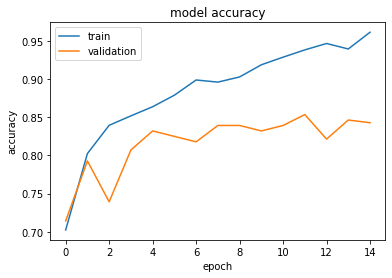

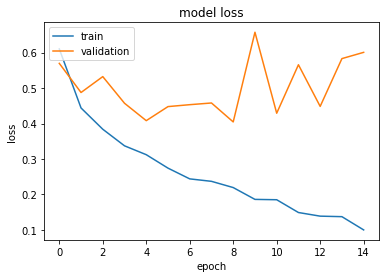

In [ ]:
# Plotting the accuracy of "model"
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "model"
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
